## TP3

Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en
Material_TPs/TP3/images a partir del template Material_TPs/TP3/template
1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos positiv. os
2. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen
coca_multi.png con el mismo témplate del ítem 1
3. (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes.
Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza
de la detección

1. Obtener una detección del logo en cada imagen sin falsos positivos

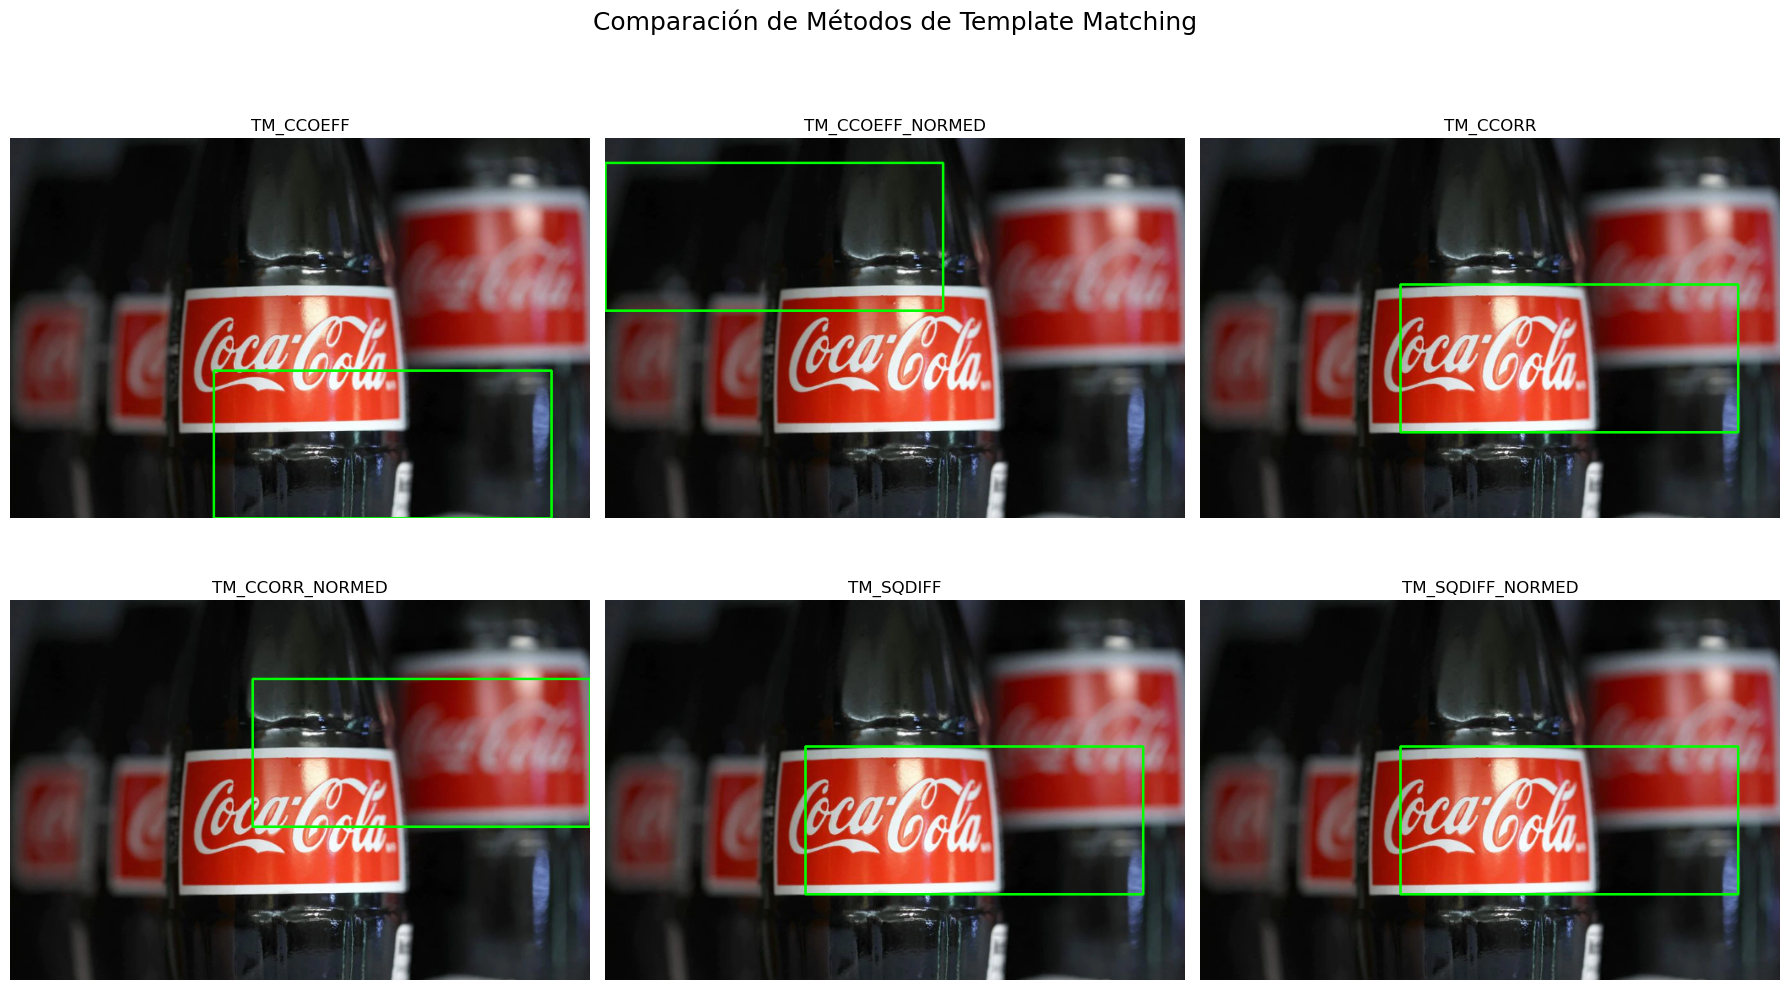

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Cargar imágenes
template_path = 'template/pattern.png'
image_path = 'images/logo_1.png'

# Verifica si los archivos existen
if not os.path.exists(template_path):
    raise FileNotFoundError(f"El template no se encontró en: {template_path}")
if not os.path.exists(image_path):
    raise FileNotFoundError(f"La imagen de prueba no se encontró en: {image_path}")

# Intenta leer las imágenes
template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image_color = cv2.imread(image_path)

# Verifica si las imágenes se cargaron bien
if template is None:
    raise ValueError("No se pudo cargar el template. Verifica que el archivo sea una imagen válida.")
if image is None or image_color is None:
    raise ValueError("No se pudo cargar la imagen. Verifica que el archivo sea una imagen válida.")

# Métodos a comparar
methods = {
    'TM_CCOEFF': cv2.TM_CCOEFF,
    'TM_CCOEFF_NORMED': cv2.TM_CCOEFF_NORMED,
    'TM_CCORR': cv2.TM_CCORR,
    'TM_CCORR_NORMED': cv2.TM_CCORR_NORMED,
    'TM_SQDIFF': cv2.TM_SQDIFF,
    'TM_SQDIFF_NORMED': cv2.TM_SQDIFF_NORMED
}

# Dimensiones del template
h, w = template.shape

# Preparar el gráfico
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

# Aplicar cada método
for i, (name, method) in enumerate(methods.items()):
    img_display = image_color.copy()
    result = cv2.matchTemplate(image, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    top_left = min_loc if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED] else max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img_display, top_left, bottom_right, (0, 255, 0), 2)
    axes[i].imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))
    axes[i].set_title(name)
    axes[i].axis('off')

plt.tight_layout()
plt.suptitle("Comparación de Métodos de Template Matching", fontsize=18, y=1.05)
plt.show()


In [22]:
import cv2
import numpy as np
import os

# Configura rutas
template_path = 'template/pattern.png'
images_dir = 'images'
output_dir = 'detected'
os.makedirs(output_dir, exist_ok=True)

# Cargar template
template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
h, w = template.shape

# Métodos y umbrales
methods = {
    'TM_CCOEFF_NORMED': (cv2.TM_CCOEFF_NORMED, 0.8),
    'TM_CCORR_NORMED': (cv2.TM_CCORR_NORMED, 0.8),
    'TM_SQDIFF_NORMED': (cv2.TM_SQDIFF_NORMED, 0.2)
}

# Procesar cada imagen
for filename in os.listdir(images_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_dir, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image_color = cv2.imread(image_path)

        if image is None or image_color is None:
            print(f" - Error cargando imagen: {filename}")
            continue

        if image.shape[0] < h or image.shape[1] < w:
            print(f" - Imagen demasiado pequeña para aplicar template matching. Saltando: {filename}")
            continue

        print(f"Procesando: {filename}")
        for method_name, (method, threshold) in methods.items():
            result = cv2.matchTemplate(image, template, method)

            # Selección del criterio
            if 'SQDIFF' in method_name:
                loc = np.where(result <= threshold)
            else:
                loc = np.where(result >= threshold)

            count = 0
            for pt in zip(*loc[::-1]):
                cv2.rectangle(image_color, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)
                count += 1

            print(f" - {method_name}: {count} detecciones")

        # Guardar imagen procesada
        out_path = os.path.join(output_dir, f"detected_{filename}")
        cv2.imwrite(out_path, image_color)

print("✅ Procesamiento completo. Imágenes guardadas en:", output_dir)


Procesando: COCA-COLA-LOGO.jpg
 - TM_CCOEFF_NORMED: 0 detecciones
 - TM_CCORR_NORMED: 609162 detecciones
 - TM_SQDIFF_NORMED: 52685 detecciones
 - Imagen demasiado pequeña para aplicar template matching. Saltando: coca_logo_1.png
 - Imagen demasiado pequeña para aplicar template matching. Saltando: coca_logo_2.png
Procesando: coca_multi.png
 - TM_CCOEFF_NORMED: 0 detecciones
 - TM_CCORR_NORMED: 86990 detecciones
 - TM_SQDIFF_NORMED: 0 detecciones
Procesando: coca_retro_1.png
 - TM_CCOEFF_NORMED: 0 detecciones
 - TM_CCORR_NORMED: 100804 detecciones
 - TM_SQDIFF_NORMED: 26008 detecciones
Procesando: coca_retro_2.png
 - TM_CCOEFF_NORMED: 0 detecciones
 - TM_CCORR_NORMED: 66996 detecciones
 - TM_SQDIFF_NORMED: 0 detecciones
Procesando: logo_1.png
 - TM_CCOEFF_NORMED: 0 detecciones
 - TM_CCORR_NORMED: 27328 detecciones
 - TM_SQDIFF_NORMED: 0 detecciones
✅ Procesamiento completo. Imágenes guardadas en: detected
